<h1>Interacciones que Conducen a Recomendaciones: Un Sistema de Recomendación de Artículos</h1>
Por Víctor González

<h1>Introducción</h1>
En el panorama actual de las empresas, la colaboración efectiva y el intercambio de conocimientos son piedras angulares para el éxito organizacional. En este contexto, plataformas como Deskdrop emergen como herramientas indispensables, facilitando la comunicación interna y el intercambio de información relevante entre los empleados de una empresa.

Deskdrop, una plataforma desarrollada por una empresa líder en tecnología, ofrece un entorno dinámico donde los profesionales pueden compartir artículos, noticias y recursos de interés con sus colegas. Esta plataforma no solo fomenta la difusión de información pertinente, sino que también promueve la colaboración y el diálogo entre equipos, impulsando así la innovación y el crecimiento dentro de la organización.

En este contexto, surge la necesidad de optimizar la experiencia de usuario y potenciar la utilidad de Deskdrop a través de un sistema de recomendación de artículos inteligente. Este sistema, basado en algoritmos avanzados de análisis de contenido y comportamiento de usuario, tiene como objetivo principal proporcionar recomendaciones personalizadas y relevantes a cada empleado, enriqueciendo así su experiencia en la plataforma y aumentando su participación activa.

En este artículo, exploraremos el diseño y la implementación de dicho sistema de recomendación, así como su impacto en la dinámica de interacción y colaboración dentro de Deskdrop. Analizaremos cómo las interacciones entre los usuarios, combinadas con técnicas de aprendizaje automático y procesamiento de lenguaje natural, impulsan la generación de recomendaciones precisas y contextualizadas, adaptadas a las necesidades e intereses de cada individuo.

<h1>Contexto</h1>

A través de este estudio, esperamos ofrecer una visión detallada de cómo las interacciones en plataformas de comunicación interna pueden transformarse en recomendaciones valiosas, promoviendo el intercambio de conocimientos y facilitando la toma de decisiones informadas en el entorno empresarial moderno.

Los datos que emplearemos contiene un período de 12 meses de la plataforma de comunicación interna DeskDrop. El conjunto de datos comprende alrededor de 73,000 interacciones de usuarios, involucrados en la plataforma al compartir más de 3,000 artículos públicos. Este conjunto de datos se destaca por sus atributos de artículo detallados, incluyendo URL, título y texto en dos idiomas, así como información contextual como fecha/hora, cliente utilizado y geolocalización. En DeskDrop, todos los usuarios deben iniciar sesión, permitiendo un seguimiento a largo plazo de preferencias sin depender de cookies. Además, registra varios tipos de interacciones de usuarios, como comentarios, me gusta y vistas, y rastrea estas interacciones en múltiples plataformas, incluyendo navegadores web y aplicaciones móviles, mostrando la diversidad de los hábitos de uso.

Este entorno de datos ofrece una oportunidad única para explorar y comprender las dinámicas de interacción en una plataforma de comunicación interna, así como para desarrollar y evaluar sistemas de recomendación que puedan mejorar la experiencia del usuario y la relevancia de los contenidos compartidos.

<h1>Sistemas de Recomendación: teoría e implementación </h1>

Los sistemas de recomendación constituyen una parte fundamental de la inteligencia artificial y el análisis de datos, con aplicaciones que van desde plataformas de streaming hasta comercio electrónico y más allá. En teoría, estos sistemas emplean algoritmos avanzados para predecir las preferencias de los usuarios y recomendarles elementos relevantes. Esto se logra mediante el análisis de datos de usuario, como historiales de navegación, compras anteriores y patrones de comportamiento. La implementación práctica de los sistemas de recomendación implica la selección y adaptación de algoritmos adecuados para el contexto específico, así como la optimización continua a medida que se recopilan más datos y se refinan los modelos. Además, la evaluación rigurosa de la efectividad y precisión de las recomendaciones es crucial para garantizar una experiencia de usuario satisfactoria y mejorar la calidad del servicio ofrecido.

<h2>Código en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [59]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import seaborn as sns
from matplotlib import pyplot as plt
import re

Primero cargamos el conjunto de datos que contiene información sobre los artículos compartidos en la plataforma. Cada artículo incluye la fecha de compartición (marca de tiempo), la URL original, el título, el contenido en texto plano, el idioma del artículo (portugués: pt o inglés: en) e información sobre el usuario que compartió el artículo (autor). Hay dos tipos de eventos posibles en una marca de tiempo dada: "CONTENT SHARED" (contenido compartido), donde el artículo está disponible para los usuarios, y "CONTENT REMOVED" (contenido eliminado), donde el artículo ya no está disponible.

In [60]:
RANDOMSEED=56

adf = pd.read_csv('shared_articles.csv')
display(adf.shape)
display(adf.head())


(3122, 13)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


array(['CONTENT REMOVED', 'CONTENT SHARED'], dtype=object)

eventType
CONTENT REMOVED      75
CONTENT SHARED     3047
dtype: int64

<Axes: xlabel='eventType', ylabel='count'>

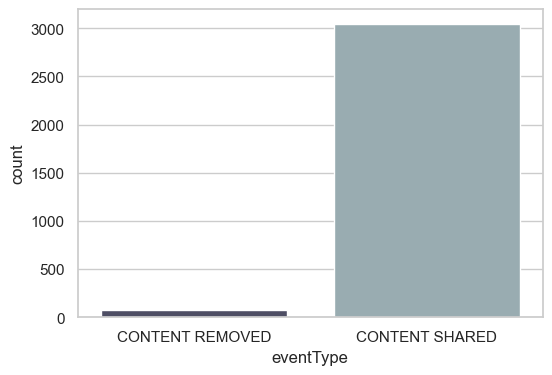

In [61]:
display(adf['eventType'].unique())
display(adf.groupby(['eventType']).size())

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.countplot(data=adf, x="eventType", hue='eventType', palette='bone')

lang
en    2264
es       2
ja       2
la       4
pt     850
dtype: int64

<Axes: xlabel='lang', ylabel='count'>

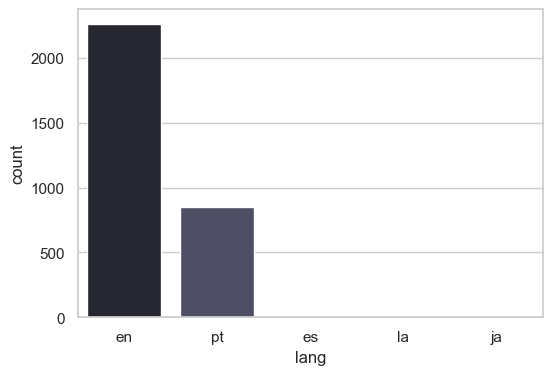

In [62]:
display(adf.groupby(['lang']).size())

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.countplot(data=adf, x="lang", hue='lang', palette='bone')

Para simplificar, solo se considera el tipo de evento "CONTENT SHARED", asumiendo ingenuamente que todos los artículos estuvieron disponibles durante todo el período de un año. Sin embargo, para una evaluación más precisa, solo se deberían recomendar los artículos disponibles en un momento dado.

In [63]:
adf = adf[adf['eventType'] == 'CONTENT SHARED']
display(adf.shape)

(3047, 13)

Luego cargamos el conjunto de datos de users_interactions que contiene registros de interacciones de usuarios en artículos compartidos. Se puede relacionar con articles_shared.csv mediante la columna contentId.

In [64]:
uidf = pd.read_csv('users_interactions.csv')
display(uidf.shape)
display(uidf.head())

(72312, 8)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


<h2>Indicadores</h2>
<h4> adf: Conjunto de datos de artículos</h4>

- timestamp: Marca de tiempo que indica el momento en que ocurrió el evento.
- eventType: En una marca de tiempo específica, los eventos pueden ser o bien el contenido compartido, lo que indica que el artículo está disponible para los usuarios, o bien el contenido eliminado, lo que indica que el artículo fue retirado de la plataforma y ya no está disponible para futuras recomendaciones.
- contentId: Identificador del artículo en la plataforma.
- authorPersonId: Identificador del usuario.
- authorSessionId: Identificador de la sesión.
- authorUserAgent: Información del agente (cadena de texto que identifica el navegador web o la aplicación utilizada para acceder al contenido) de usuario del usuario que publicó inicialmente el artículo.
- authorRegion: La ubicación geográfica del usuario que publicó inicialmente el artículo.
- authorCountry: El país del usuario que publicó inicialmente el artículo.
- contentType: Formato del artículo.
- url: Enlace directo del artículo.
- title: Titulo del artículo.
- text: Texto completo del artículo.
- lang: Lenguaje del artículo.


<h4> uidf: Conjunto de datos de interacciones de usuarios con los artículos.</h4>

- timestamp: marca de tiempo que indica el momento en que ocurrió el evento.
- eventType: Los valores de eventType son: VIEW (vista), LIKE (me gusta), COMMENT CREATED (comentario creado), FOLLOW (seguir) y BOOKMARK (marcador).
- contentId: Identificador del artículo en la plataforma.
- personId: Identificador del usuario.
- sessionId: Identificador de la sesión.
- userAgent: Información del agente (cadena de texto que identifica el navegador web o la aplicación utilizada para acceder al contenido) de usuario del usuario que interactua con el artículo.
- userRegion: La ubicación geográfica del usuario que interactua con el artículo.
- userCountry: El país del usuario que interactua con el artículo.

<h1>Análisis exploratorio de datos</h1>




In [65]:
uidf['datetime'] = pd.to_datetime(uidf['timestamp'], unit='s')



<Axes: title={'center': 'Número de interacciones por día'}, xlabel='Fecha', ylabel='Cantidad de Interacciones'>

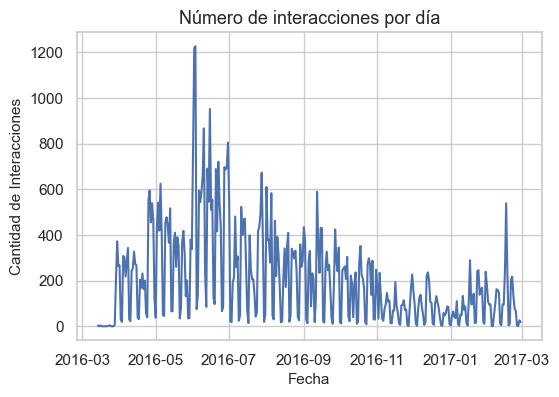

In [66]:
gdf = uidf.groupby([pd.Grouper(key='datetime', freq='D')]).agg({'eventType':'count'}).reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
plt.title('Número de interacciones por día', fontsize=13)
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Cantidad de Interacciones', fontsize=11)
sns.lineplot(data=gdf, y="eventType", x='datetime')

La grafica muestra la cantidad total de interacciones que ocurrieron en la plataforma durante cada día en el período de tiempo del conjunto de datos. Esta gráfica proporciona una visualización de la actividad diaria en la plataforma, lo que permitiría identificar patrones de uso, picos de actividad y tendencias a lo largo del tiempo. Además, ayuda a detectar cambios significativos en la participación de los usuarios o en la popularidad de la plataforma en diferentes momentos.

<Axes: title={'center': 'Histograma de interacción de usuario y contenido'}, xlabel='Cantidad de usuario', ylabel='Cantidad de interacción por usuario'>

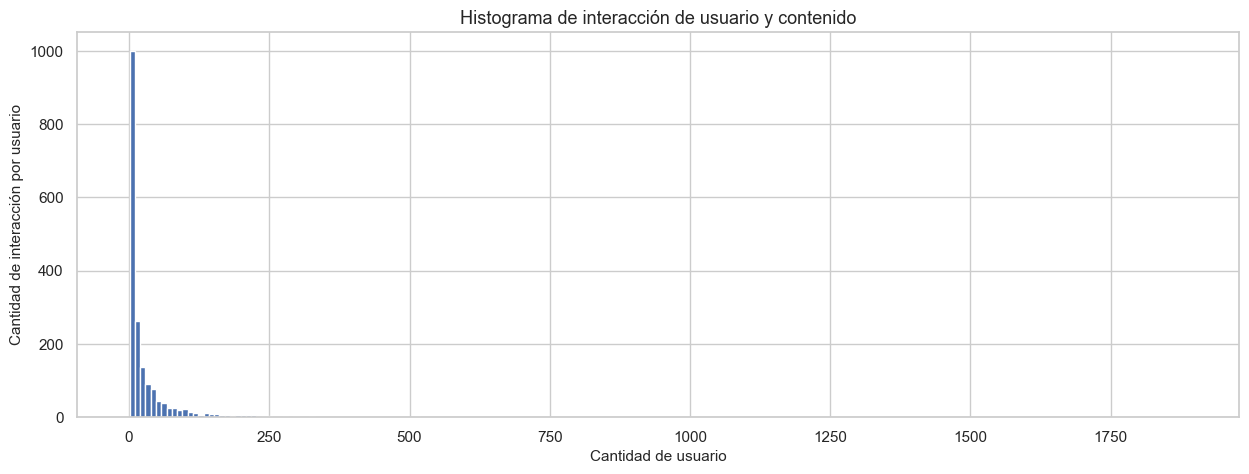

In [67]:
plt.title('Histograma de interacción de usuario y contenido', fontsize=13)
plt.xlabel('Cantidad de usuario', fontsize=11)
plt.ylabel('Cantidad de interacción por usuario', fontsize=11)
uidf.groupby('personId')['contentId'].size().hist(bins=200, figsize=(15,5))

El histograma de interacción de usuario y contenido mostra la distribución de las interacciones entre usuarios y contenido en la plataforma. En el eje horizontal, tenemos diferentes rangos o categorías que representan la cantidad de interacciones realizadas por los usuarios. En el eje vertical, tenemos la frecuencia o el número de usuarios que realizaron esa cantidad de interacciones. Este histograma nos permite tener una idea de cómo se distribuyen las interacciones entre los usuarios y el contenido, lo que puede ayudar a identificar patrones de comportamiento, como la cantidad de usuarios que son muy activos en la plataforma en comparación con aquellos que tienen una participación más baja. También podría revelar si hay ciertos contenidos que generan más interacciones que otros, lo que sería útil para comprender qué tipo de contenido es más popular entre los usuarios.

<Axes: title={'center': 'Número de artículos compartidos por día'}, xlabel='Fecha', ylabel='Cantidad de Artículos'>

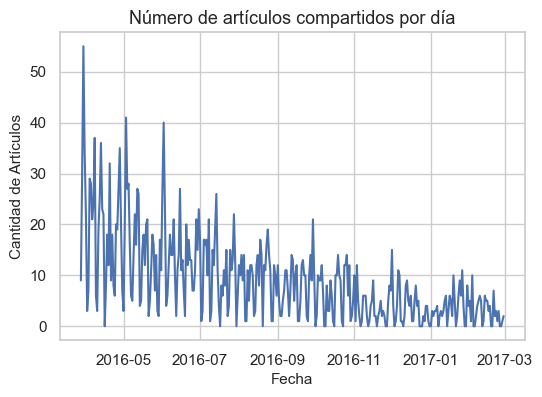

In [68]:
adf['datetime'] = pd.to_datetime(adf['timestamp'], unit='s')
gdf = adf.groupby([pd.Grouper(key='datetime', freq='D')]).agg({'eventType':'count'}).reset_index()

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
plt.title('Número de artículos compartidos por día', fontsize=13)
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Cantidad de Artículos', fontsize=11)
sns.lineplot(data=gdf, y="eventType", x='datetime')

La grafica muestra la distribución de la cantidad de artículos compartidos en la plataforma a lo largo del tiempo. En el eje horizontal, tenemos los días del período analizado, y en el eje vertical, el número de artículos compartidos en cada día. Este gráfico nos proporcionaría una visualización de cómo varía la actividad de compartir artículos a lo largo del tiempo.

<Axes: title={'center': 'Dominios principales en artículos compartidos'}, ylabel='urlDomain'>

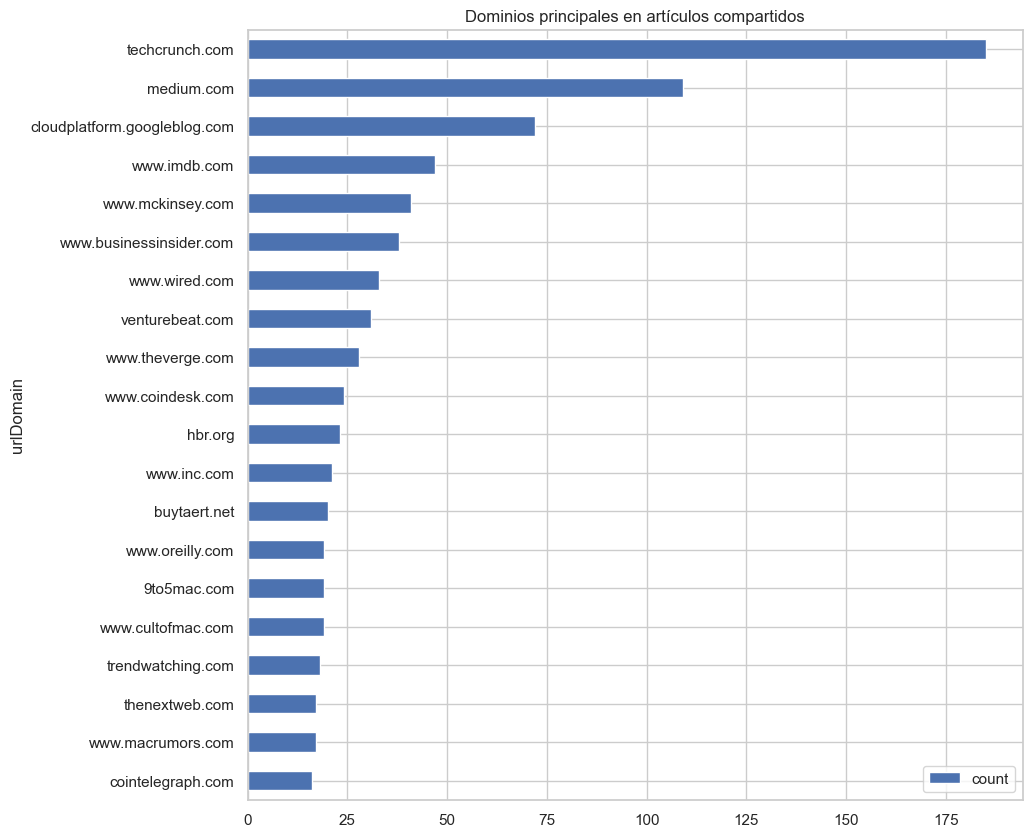

In [69]:
adf['urlDomain'] = adf['url'].apply(lambda x: re.sub(r'^http[s]*:\/\/', '', re.search(r'^http[s]*:\/\/[\w\.]*', x, re.IGNORECASE).group(0)))
domain = pd.DataFrame(adf[adf['lang'] == 'en'].groupby('urlDomain').size().sort_values(ascending=True))[-20:].reset_index()
domain.columns = ['urlDomain','count']
domain.plot(kind='barh', x='urlDomain', y='count', figsize=(10,10), title='Dominios principales en artículos compartidos')

El grafico muestra los dominios de los sitios web más frecuentemente compartidos en la plataforma. Cada barra representa un dominio específico. Este gráfico nos da una idea clara de cuáles son los sitios web más populares cuyos artículos son compartidos en la plataforma. Podemos identificar los dominios más relevantes o populares entre los usuarios, lo que  ayuda a comprender mejor los intereses y preferencias de la audiencia. 

<h2>Categorización de los datos</h2>

Dado que hay diversos tipos de interacciones, asignamos a cada una un peso o fuerza, suponiendo que, por ejemplo, un comentario en un artículo refleja un mayor interés por parte del usuario que un "me gusta" o una simple vista.

In [70]:
event_strength = {
   'VIEW': 1,
   'LIKE': 2, 
   'BOOKMARK': 3, 
   'FOLLOW': 4,
   'COMMENT CREATED': 5,  
}

uidf['eventStrength'] = uidf['eventType'].apply(lambda x: event_strength[x])
display(uidf.head())

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,datetime,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,2016-06-08 19:10:32,1
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,2016-06-08 19:02:40,1
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,2016-06-08 20:03:10,1
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,2016-06-08 19:24:55,4
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,2016-06-08 18:58:10,1


Los sistemas de recomendación se enfrentan a un obstáculo bien conocido denominado "arranque en frío del usuario". Este fenómeno se manifiesta cuando resulta desafiante proporcionar recomendaciones personalizadas a usuarios que aún no han interactuado con la plataforma o tienen un historial de interacciones limitado. Este problema surge debido a la falta de datos suficientes para modelar con precisión las preferencias de estos usuarios. Ante esta realidad, adoptamos una estrategia específica en nuestro conjunto de datos donde solo conservamos a los usuarios que han llevado a cabo al menos 5 interacciones. Esta selección cuidadosa nos permite trabajar con usuarios que han demostrado cierto nivel de compromiso con la plataforma, lo que a su vez nos proporciona una base más sólida para ofrecer recomendaciones relevantes y personalizadas.

In [71]:
display('Número total de usuarios que han interactuado en la plataforma: %d' % len(uidf['personId'].unique()))

count_ui = uidf.groupby(['personId', 'contentId']).size().groupby('personId').size()
users5i_df = count_ui[count_ui >= 5].reset_index()[['personId']]
display('Cantidad total de usuarios que han realizado al menos 5 interacciones en la plataforma: %d' % len(users5i_df))

'Número total de usuarios que han interactuado en la plataforma: 1895'

'Cantidad total de usuarios que han realizado al menos 5 interacciones en la plataforma: 1140'

El número total de usuarios que han interactuado en la plataforma es de 1895, mientras que la cantidad total de usuarios que han realizado al menos 5 interacciones en la plataforma es de 1140. Al limitar nuestro análisis a estos usuarios más activos, podemos asegurar que la información que utilizamos para generar recomendaciones esté respaldada por una participación significativa en la plataforma. Esto, a su vez, nos proporciona una base más sólida para ofrecer recomendaciones relevantes y personalizadas, ya que contamos con datos más sustanciales sobre las preferencias y comportamientos de estos usuarios comprometidos.

In [72]:
display('Número total de interacciones en la plataforma: %d' % len(uidf))
uidf= uidf[uidf['personId'].isin(users5i_df['personId'].tolist())]
display('Cantidad total de interacciones de usuarios que han realizado al menos 5 interacciones en la plataforma: %d' % len(uidf))
display(uidf.head())

'Número total de interacciones en la plataforma: 72312'

'Cantidad total de interacciones de usuarios que han realizado al menos 5 interacciones en la plataforma: 69868'

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,datetime,eventStrength
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,2016-06-08 19:10:32,1
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,2016-06-08 19:02:40,1
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN,2016-06-08 20:03:10,1
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN,2016-06-08 19:24:55,4
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN,2016-06-08 18:58:10,1


El número total de interacciones en la plataforma es 72,312, mientras que la cantidad total de interacciones realizadas por usuarios con al menos 5 interacciones es 69,868.

En Deskdrop, los usuarios tienen permitido ver un artículo muchas veces e interactuar con ellos de diferentes maneras. Por lo tanto, para modelar el interés del usuario en un artículo dado, agregamos todas las interacciones que el usuario ha realizado en un ítem mediante una suma ponderada de la fuerza del tipo de interacción y aplicamos una transformación logarítmica para suavizar la distribución.

In [73]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
idf = uidf.groupby(['personId', 'contentId'])['eventStrength'].sum().apply(smooth_user_preference).reset_index()
display('Número de interacciones distintas entre usuario y artículo.: %d' % len(idf))
display(idf.head())

'Número de interacciones distintas entre usuario y artículo.: 39106'

,personId,contentId,eventStrength
0,-9223121837663643404,-8949113594875411859,1.000000
1,-9223121837663643404,-8377626164558006982,1.000000
2,-9223121837663643404,-8208801367848627943,1.000000
3,-9223121837663643404,-8187220755213888616,1.000000
4,-9223121837663643404,-7423191370472335463,3.169925


Esta parte se refiere a la cantidad de veces que los usuarios han interactuado con los artículos de la plataforma de manera única o individual. Esto implica que cada interacción se cuenta solo una vez, sin importar cuántas veces un usuario específico haya interactuado con el mismo artículo. Por lo tanto, el valor de 39106 indica que se han registrado 39106 interacciones únicas entre usuarios y artículos en la plataforma.

En el proceso de construcción y evaluación de modelos, la primera etapa crucial implica dividir nuestros datos en conjuntos de entrenamiento y prueba. Esta separación nos permite entrenar nuestro modelo con un conjunto de datos y luego evaluar su rendimiento en otro conjunto independiente. El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba se reserva para evaluar su capacidad para generalizar a datos no vistos. Esta división garantiza que nuestro modelo no memorice los datos de entrenamiento y pueda realizar predicciones precisas sobre nuevos datos. Mantener la integridad de esta separación es fundamental para obtener resultados confiables al evaluar el rendimiento del modelo.

Utilizamos el parámetro stratify para asegura que la división se realice de manera que se mantenga la misma proporción de clases en ambos conjuntos de datos de entrenamiento y prueba. Es útil utilizar este parametro cuando tenemos un conjunto de datos donde las clases están desbalanceadas, es decir, hay una cantidad significativamente mayor de instancias de una clase en comparación con otras, es importante garantizar que esta proporción se mantenga en los conjuntos de entrenamiento y prueba. De lo contrario, podríamos terminar con un conjunto de entrenamiento que contiene una cantidad desproporcionada de instancias de una clase en particular, lo que podría sesgar el entrenamiento del modelo.

Este parámetro aborda este problema al dividir el conjunto de datos de manera que cada clase esté representada en proporciones similares en ambos conjuntos de entrenamiento y prueba. Esto garantiza que el modelo pueda aprender de manera equilibrada de todas las clases y que la evaluación del rendimiento del modelo sea más confiable, especialmente en casos de conjuntos de datos desbalanceados.

In [74]:
train_df, val_df = train_test_split(idf, stratify=idf['personId'], test_size=0.2, random_state=RANDOMSEED)

display(train_df.shape)
display(val_df.shape)
display(train_df.head())

(31284, 3)

(7822, 3)

,personId,contentId,eventStrength
24048,1949009070102523745,5484061377044071389,1.000000
11918,-2979881261169775358,-986027724303592548,1.000000
20721,674947025087085832,-133139342397538859,2.000000
13220,-2626634673110551643,3547081132182529111,1.584963
23635,1895326251577378793,-4095842175692097942,1.000000


Vamos a indexar el conjunto de datos por personId para acelerar las búsquedas durante la evaluación de los modelos. En otras palabras, el sistema puede encontrar información específica relacionada con un usuario más rápidamente durante el proceso de evaluación. Esto puede ser especialmente útil cuando se manejan grandes volúmenes de datos y se requiere una eficiencia en las consultas.

In [75]:
idf = idf.set_index('personId')
train_df = train_df.set_index('personId')
val_df = val_df.set_index('personId')
display(idf.head())

,contentId,eventStrength
personId,,
-9223121837663643404,-8949113594875411859,1.000000
-9223121837663643404,-8377626164558006982,1.000000
-9223121837663643404,-8208801367848627943,1.000000
-9223121837663643404,-8187220755213888616,1.000000
-9223121837663643404,-7423191370472335463,3.169925


<h1>Entrenamiento de los modelos</h1>

<h2>Basado en Popularidad </h2>

Un sistema de recomendación basado en popularidad es un tipo básico de sistema de recomendación que utiliza la popularidad o la frecuencia de un artículo para hacer recomendaciones. En este modelo, los artículos se recomiendan a los usuarios en función de su popularidad general, es decir, aquellos que son los más consumidos o vistos por la mayoría de los usuarios en la plataforma. Este enfoque es simple de implementar y puede ser útil en situaciones donde no se dispone de información detallada sobre las preferencias individuales de los usuarios. Sin embargo, este modelo no tiene en cuenta las preferencias individuales de los usuarios y puede no ser adecuado para proporcionar recomendaciones personalizadas o relevantes para cada usuario. Es más adecuado para aplicaciones donde la popularidad general de un artículo es un indicador suficiente de su valor para la mayoría de los usuarios.

Debemos identificar y calcular los elementos más populares en el conjunto de datos. Este proceso implica analizar las interacciones de los usuarios con los elementos y determinar cuáles son los más consumidos, vistos o interaccionados por la mayoría de los usuarios. Se debe calculae una métrica de popularidad para cada elemento, como el número total de interacciones. Luego, se seleccionan los elementos con las métricas de popularidad más altas como los "más populares".

Dado que la popularidad refleja la sabiduría de las masas, generalmente ofrece buenas recomendaciones, siendo en general interesantes para la mayoría de las personas. Sin embargo, el principal objetivo de un sistema de recomendación es aprovechar los elementos de cola larga para usuarios con intereses muy específicos, lo que va mucho más allá de esta simple técnica.



In [76]:
pop_df = idf.groupby('contentId')['eventStrength'].sum().sort_values(ascending=False).reset_index()
pop_df.head()
    

,contentId,eventStrength
0,-4029704725707465084,310.791362
1,-6783772548752091658,237.145410
2,-133139342397538859,229.089057
3,-8208801367848627943,199.660338
4,-6843047699859121724,196.174998


En los Sistemas de Recomendación, hay un conjunto de métricas comúnmente utilizadas para la evaluación. Optamos por trabajar con métricas de precisión Top-N, las cuales evalúan la precisión de las principales recomendaciones proporcionadas a un usuario, comparándolas con los elementos con los que el usuario ha interactuado realmente en el conjunto de prueba. La métrica de precisión Top-N elegida fue Recall, la cual evalúa si el elemento interactuado se encuentra entre los primeros N elementos (aciertos) en la lista clasificada de 101 recomendaciones para un usuario.

El recall es una métrica importante en la evaluación de los sistemas de recomendación, ya que mide la capacidad del sistema para identificar todos los elementos relevantes para un usuario dentro de una lista de recomendaciones. En otras palabras, el recall nos dice qué tan efectivamente el sistema puede recuperar los elementos que el usuario realmente encuentra interesantes o útiles. Un alto recall indica que el sistema está identificando la mayoría de los elementos relevantes para el usuario, lo que resulta en recomendaciones más útiles y satisfactorias. Por otro lado, un bajo recall puede significar que el sistema está perdiendo elementos importantes, lo que puede llevar a recomendaciones poco acertadas y, en última instancia, a una experiencia insatisfactoria para el usuario.

Vamos a desarrollar un conjunto de funciones que nos permitirá evaluar el modelo inicialmente propuesto y luego reutilizar estas mismas funciones para evaluar los diferentes modelos que desarrollaremos en este estudio. Estas funciones nos proporcionarán una manera sistemática de medir y comparar el rendimiento de los modelos en diferentes métricas de evaluación, con un enfoque particular en la métrica de Recall. En específico, mediremos el recall para los top 5 y los top 10, lo que nos permitirá evaluar la capacidad de los modelos para recomendar correctamente los elementos relevantes para los usuarios en las posiciones principales de las recomendaciones. Esto nos facilitará tomar decisiones informadas sobre qué modelo es más adecuado para nuestras necesidades, utilizando las mismas métricas de evaluación en todos los casos para una comparación coherente y precisa.


In [77]:
def get_items_interacted(person_id, interactions):
    interacted_items = interactions.loc[person_id]['contentId']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

La función get_items_interacted se encarga de obtener los artículos con los que un usuario ha interactuado en la plataforma. Esta función toma como entrada el identificador del usuario y el conjunto de datos de interacciones. Devuelve una lista de los artículos con los que el usuario ha interactuado.

In [78]:
def recommend_items(user_id, items_to_ignore=[], verbose=False):
    # Recommend the more popular items that the user hasn't seen yet.
    recommendations_df = pop_df[~pop_df['contentId'].isin(items_to_ignore)].sort_values('eventStrength', ascending = False)

    if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['eventStrength', 'contentId', 'title', 'url', 'lang']]
            
    return recommendations_df

La función recommend_items está diseñada para recomendar artículos a un usuario específico utilizando un modelo de popularidad. Toma como entrada el identificador del usuario (user_id), una lista opcional de artículos que el usuario desea ignorar (items_to_ignore), y un parámetro opcional para controlar la verbosidad de la salida (verbose).

La recomendación se basa en la popularidad de los artículos en general, es decir, aquellos que han sido más consumidos o interaccionados por la mayoría de los usuarios en la plataforma. La función filtra los artículos ignorados por el usuario y devuelve una lista de los artículos más populares que el usuario aún no ha interactuado.

In [79]:
def get_not_interacted_items_sample(person_id, sample_size, seed=RANDOMSEED):
    interacted_items = get_items_interacted(person_id, idf)
    all_items = set(adf['contentId'])
    non_interacted_items = all_items - interacted_items

    random.seed(seed)
    non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
    return set(non_interacted_items_sample)

La función get_not_interacted_items_sample se encarga de obtener una muestra de artículos con los que un usuario específico no ha interactuado en la plataforma. Toma como entrada el identificador del usuario y el tamaño de la muestra deseada, y devuelve una lista de identificadores de artículos que el usuario aún no ha interactuado.

In [80]:
def verify_hit_top_n(item_id, recommended_items, topn):        
        try:
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            index = -1
        hit = int(index in range(0, topn))
        return hit, index

La función verify_hit_top_n se encarga de verificar si un artículo interactuado por un usuario específico se encuentra entre las recomendaciones principales proporcionadas por un sistema de recomendación. 

In [81]:

def evaluate_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 

    person_recs_df = recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0
    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics


Hemos desarrollado una función específica para evaluar el modelo de popularidad, donde llamamos las funciones descritas anteriormente. Esta función se encarga de utilizar las herramientas proporcionadas para calcular métricas de evaluación, como el recall, para el modelo de popularidad. Al llamar a las funciones `get_items_interacted`, `get_not_interacted_items_sample` y `verify_hit_top_n`, podemos obtener las interacciones de los usuarios, una muestra de artículos no interaccionados y verificar si los artículos interactuados están entre las recomendaciones principales. Esta función nos proporciona una forma sistemática de evaluar el rendimiento del modelo de popularidad en términos de su capacidad para recomendar con precisión los elementos relevantes para los usuarios.



In [82]:
people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    person_metrics = evaluate_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

popularity_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

popularity_recall_at_5 = popularity_df['hits@5_count'].sum() / float(popularity_df['interacted_count'].sum())
popularity_recall_at_10 = popularity_df['hits@10_count'].sum() / float(popularity_df['interacted_count'].sum())

popularity_metrics = {'modelName': 'Popularity',
                    'recall@5': popularity_recall_at_5,
                    'recall@10': popularity_recall_at_10}    

display('Métricas de evaluación del modelo de popularidad incluyen el recall para los top 5 y top 10 recomendaciones %s' % popularity_metrics)
popularity_df.head()

"Métricas de evaluación del modelo de popularidad incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Popularity', 'recall@5': 0.24546151879314754, 'recall@10': 0.38136026591664535}"

,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,37,59,192,0.192708,0.307292,3609194402293569455
18,10,20,134,0.074627,0.149254,-2626634673110551643
95,6,10,130,0.046154,0.076923,-1032019229384696495
112,9,22,117,0.076923,0.188034,-1443636648652872475
22,16,31,88,0.181818,0.352273,-2979881261169775358


Estamos calculando el recall para los top 5 y top 10 recomendaciones generadas por el modelo de popularidad. Para el recall@5, el valor obtenido es aproximadamente 0.245, lo que indica que alrededor del 24.5% de los elementos relevantes fueron recomendados en los primeros 5 elementos de la lista de recomendaciones. Para el recall@10, el valor obtenido es aproximadamente 0.381, lo que significa que alrededor del 38.1% de los elementos relevantes fueron recomendados en los primeros 10 elementos de la lista de recomendaciones.

Estas métricas nos proporcionan información sobre la capacidad del modelo de popularidad para recomendar correctamente elementos relevantes para los usuarios en las posiciones principales de las recomendaciones. Cuanto más alto sea el valor de recall, mejor será el rendimiento del modelo en términos de la capacidad para identificar y recomendar elementos relevantes.

Necesitamos un modelo de mayor Recall, dado que este no tiene los valores suficientes para garantizar que el sistema de recomendación pueda proporcionar recomendaciones útiles y relevantes para los usuarios.

<h2>Basado en Contenido</h2>

Un sistema de recomendación basado en contenido es un enfoque utilizado para generar recomendaciones personalizadas al analizar las características y atributos de los elementos recomendados y compararlos con el perfil de preferencias de un usuario. Este tipo de sistema se basa en la idea de que los usuarios tienen preferencias específicas sobre ciertos atributos de los elementos El sistema analiza los atributos de los elementos que el usuario ha consumido previamente y utiliza esta información para recomendar otros elementos con características similares que se ajusten a los intereses del usuario. Este enfoque es beneficioso porque puede ofrecer recomendaciones precisas y personalizadas incluso para usuarios nuevos o para aquellos con historiales de interacción limitados. Además, el sistema de recomendación basado en contenido es menos susceptible al problema del arranque en frío del usuario, ya que puede generar recomendaciones basadas únicamente en las características de los elementos, sin necesidad de datos de interacción del usuario. 

Para modelar el perfil del usuario, tomamos todos los perfiles de los elementos con los que el usuario ha interactuado y los promediamos. El promedio se pondera por la fuerza de la interacción, es decir, los artículos con los que el usuario ha interactuado más tendrán una fuerza más alta en el perfil final del usuario.

In [83]:
stopwords_list = stopwords.words('english')

vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=5000,
                     stop_words=stopwords_list)

item_ids = adf['contentId'].tolist()
tfidf_matrix = vectorizer.fit_transform(adf['title'] + "" + adf['text'])
tfidf_feature_names = vectorizer.get_feature_names_out()
display(tfidf_matrix)

<3047x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 677781 stored elements in Compressed Sparse Row format>

En el contexto del procesamiento del lenguaje natural, es necesario excluir palabras que carecen de significado semántico y que no aportan información relevante para el análisis del texto. Estas palabras, conocidas como palabras vacías o "stop words", incluyen términos comunes como "the", "is", "and", entre otros, que se encuentran con frecuencia en el idioma pero que no transmiten significado por sí solos. Dado que nuestro conjunto de datos contiene texto en inglés, utilizamos la función stopwords.words('english') para identificar y excluir estas palabras vacías del texto durante el procesamiento.

Al eliminar las palabras vacías, el modelo puede concentrarse en capturar mejor las relaciones y los significados presentes en el texto, lo que puede mejorar la calidad de las representaciones vectoriales y, en última instancia, el rendimiento del modelo en diversas tareas de procesamiento del lenguaje natural.

In [84]:
def get_item_profile(item_id):
    idx = item_ids.index(item_id)
    item_profile = tfidf_matrix[idx:idx+1]
    return item_profile

La función get_item_profile obtiene el perfil de un artículo específico en función de sus características y atributos.

In [85]:
def get_item_profiles(ids):
    item_profiles_list = [get_item_profile(x) for x in ids]
    item_profiles = scipy.sparse.vstack(item_profiles_list)
    return item_profiles

La función get_item_profiles se encarga de obtener los perfiles de múltiples artículos a la vez. Toma como entrada una lista de identificadores de artículos y devuelve los perfiles correspondientes para cada uno de ellos.

In [86]:
def build_users_profile(person_id, interactions_indexed_df):
    interactions_person_df = interactions_indexed_df.loc[person_id]
    user_item_profiles = get_item_profiles(interactions_person_df['contentId'])
    
    
    user_item_strengths = np.array(interactions_person_df['eventStrength']).reshape(-1,1)
    #Weighted average of item profiles by the interactions strength
    user_item_strengths_weighted_avg = np.sum(user_item_profiles.multiply(user_item_strengths), axis=0) / np.sum(user_item_strengths)
    user_item_strengths_weighted_avg= np.asarray(user_item_strengths_weighted_avg) #np.matrix is not supported. Please convert to a numpy array with np.asarray.
    user_profile_norm = sklearn.preprocessing.normalize(user_item_strengths_weighted_avg)

    return user_profile_norm

La función build_users_profile construye el perfil de un usuario en función de los perfiles de los artículos con los que ha interactuado. Utiliza los perfiles de los artículos para calcular un perfil agregado que represente los intereses y preferencias del usuario en el conjunto de datos.

In [87]:
def build_users_profiles(): 
    interactions_indexed_df = train_df[train_df['contentId'].isin(adf['contentId'])]
    user_profiles = {}
    for person_id in interactions_indexed_df.index.unique():
        user_profiles[person_id] = build_users_profile(person_id, interactions_indexed_df)
    return user_profiles

La función build_users_profiles se encarga de construir perfiles para múltiples usuarios a la vez. Toma como entrada una lista de identificadores de usuarios y utiliza los perfiles de los artículos con los que cada usuario ha interactuado para calcular perfiles agregados para cada uno de ellos.

In [88]:

user_profiles = build_users_profiles()
len(user_profiles)

1140

Se crearon perfiles para un total de 1140 usuarios. 

Luego generamos una función que se encarga de encontrar artículos similares al perfil de un usuario en función de los perfiles de los artículos y el perfil del usuario. Utilizando técnicas de similitud, compara el perfil del usuario con los perfiles de todos los artículos disponibles en el conjunto de datos y devuelve una lista de los artículos más similares al perfil del usuario. Estos artículos similares representan recomendaciones potenciales para el usuario, ya que comparten características y atributos similares a los artículos con los que el usuario ha interactuado previamente.  

In [89]:
def get_similar_items_to_user_profile(person_id, topn=1000):
    #Computes the cosine similarity between the user profile and all item profiles
    cosine_similarities = cosine_similarity(user_profiles[person_id], tfidf_matrix)
    #Gets the top similar items
    similar_indices = cosine_similarities.argsort().flatten()[-topn:]
    #Sort the similar items by similarity
    similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
    return similar_items

Hemos desarrollado una función específica de recomendación para el modelo Basado en Contenido. Esta función se encarga de encontrar artículos similares al perfil de un usuario en función de los perfiles de los artículos y el perfil del usuario. Utilizando técnicas de similitud, compara el perfil del usuario con los perfiles de todos los artículos disponibles en el conjunto de datos y devuelve una lista de los artículos más similares al perfil del usuario. Estos artículos similares representan recomendaciones potenciales para el usuario, ya que comparten características y atributos similares a los artículos con los que el usuario ha interactuado previamente. 

In [90]:
def recommend_cont_items(user_id, items_to_ignore=[], verbose=False):
    similar_items = get_similar_items_to_user_profile(user_id)
    #Ignores items the user has already interacted
    similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))        
    recommendations_df = pd.DataFrame(similar_items_filtered, columns=['contentId', 'recStrength'])

    if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]
            
    return recommendations_df

Hemos desarrollado una función específica para evaluar el modelo basado en contenido. Esta función se encarga de calcular métricas de evaluación, como el recall, para el modelo basado en contenido. Utilizando las herramientas proporcionadas por el modelo, la función evalúa la capacidad del modelo para generar recomendaciones precisas y relevantes para los usuarios. 

In [91]:
def evaluate_cont_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 

    person_recs_df = recommend_cont_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0
    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics

In [92]:


people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    person_metrics = evaluate_cont_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

content_df = pd.DataFrame(people_metrics) \
                    .sort_values('interacted_count', ascending=False)

content_recall_at_5 = content_df['hits@5_count'].sum() / float(content_df['interacted_count'].sum())
content_recall_at_10 = content_df['hits@10_count'].sum() / float(content_df['interacted_count'].sum())

content_metrics = {'modelName': 'Content',
                    'recall@5': content_recall_at_5,
                    'recall@10': content_recall_at_10}    

print('Métricas de evaluación del modelo de contenido incluyen el recall para los top 5 y top 10 recomendaciones %s' % content_metrics)
content_df.head()

Métricas de evaluación del modelo de contenido incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Content', 'recall@5': 0.09703400664791613, 'recall@10': 0.16977755049859372}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,9,17,192,0.046875,0.088542,3609194402293569455
18,9,17,134,0.067164,0.126866,-2626634673110551643
95,7,21,130,0.053846,0.161538,-1032019229384696495
112,36,47,117,0.307692,0.401709,-1443636648652872475
22,1,2,88,0.011364,0.022727,-2979881261169775358


Calculamos el recall para las mejores 5 y 10 recomendaciones generadas por el modelo de contenido. Para el recall@5, el valor obtenido es aproximadamente 0.097, lo que indica que alrededor del 9.7% de los elementos relevantes fueron recomendados en los primeros 5 elementos de la lista de recomendaciones. Para el recall@10, el valor obtenido es aproximadamente 0.169, lo que significa que alrededor del 16.9% de los elementos relevantes fueron recomendados en los primeros 10 elementos de la lista de recomendaciones. Estas métricas continúan mostrando niveles bajos, lo que sugiere que el sistema de recomendación basado en contenido aún no está agregando suficiente valor para los usuarios.

<h2>Colaborativo</h2>

Un sistema de recomendación basado en filtrado colaborativo es un enfoque que utiliza las interacciones de los usuarios con los elementos para realizar recomendaciones. La idea fundamental es encontrar similitudes entre usuarios o entre elementos para predecir la preferencia de un usuario por un elemento no interactuado previamente. Esto se logra mediante el análisis de patrones de comportamiento de usuarios similares o la comparación de características de elementos similares.

El filtrado colaborativo es efectivo para capturar gustos y preferencias individuales, así como para recomendar elementos nuevos y relevantes en función de patrones de comportamiento colectivo. Sin embargo, puede enfrentar desafíos en escenarios con datos escasos o dispersos y puede sufrir de problemas como el arranque en frío del usuario y el arranque en frío del ítem.

En nuestra implementación utilizamos los modelos de factores latentes para comprimir una matriz usuario-elemento en una representación de baja dimensionalidad en términos de factores latentes. Una ventaja de este enfoque es que, en lugar de tener una matriz de alta dimensionalidad con una gran cantidad de valores faltantes, estaremos trabajando con una matriz mucho más pequeña en un espacio de baja dimensionalidad. Esta presentación reducida puede ser utilizada tanto para algoritmos de vecindario basados en usuarios como en elementos. Hay varias ventajas con este paradigma. Maneja mejor la dispersión de la matriz original que los métodos basados en memoria. Además, comparar la similitud en la matriz resultante es mucho más escalable, especialmente al tratar con conjuntos de datos grandes y dispersos.

Aquí utilizamos un modelo de factor latente popular llamado Descomposición en Valores Singulares (SVD). Una decisión importante es el número de factores para factorizar la matriz usuario-elemento. Cuantos más factores, más precisa es la factorización en las reconstrucciones originales de la matriz. Por lo tanto, si el modelo puede memorizar demasiados detalles de la matriz original, es posible que no generalice bien para datos en los que no fue entrenado. Reducir el número de factores aumenta la generalización del modelo.

En los siguientes pasos, podemos observar la construcción de la matriz.

In [93]:
users_items_pivot_matrix_df = train_df.pivot(columns='contentId', values='eventStrength').fillna(0)
users_items_pivot_matrix_df.head()

contentId,-9222795471790223670,-9216926795620865886,-9194572880052200111,-9192549002213406534,-9190737901804729417,-9189659052158407108,-9176143510534135851,-9172673334835262304,-9171475473795142532,-9166778629773133902,...,9191014301634017491,9207286802575546269,9208127165664287660,9209629151177723638,9209886322932807692,9213260650272029784,9215261273565326920,9217155070834564627,9220445660318725468,9222265156747237864
personId,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9207251133131336884,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9199575329909162940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9196668942822132778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[-9223121837663643404,
 -9212075797126931087,
 -9207251133131336884,
 -9199575329909162940,
 -9196668942822132778,
 -9188188261933657343,
 -9172914609055320039,
 -9156344805277471150,
 -9120685872592674274,
 -9109785559521267180]

In [96]:
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)
users_items_pivot_sparse_matrix

<1140x2933 sparse matrix of type '<class 'numpy.float64'>'
	with 31284 stored elements in Compressed Sparse Row format>

Con la matriz usuario-elemento.  ya creada, podemos definir el número de factores en 15 para entrenar el modelo SVD. 

In [97]:

NUMBER_OF_FACTORS_MF = 15

U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)

display(U.shape)
display(sigma.shape)
display(Vt.shape)

(1140, 15)

(15, 15)

(15, 2933)

Después de la factorización, intentamos reconstruir la matriz original multiplicando sus factores. La matriz resultante ya no es dispersa. Se generaron predicciones para los elementos con los que el usuario aún no ha interactuado, lo que aprovecharemos para hacer recomendaciones.

In [98]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())

all_user_predicted_ratings

array([[ 2.94667020e-02,  4.93885526e-03,  1.28018121e-03, ...,
        -9.09729040e-03,  5.99877754e-03,  1.40575945e-02],
       [-4.44632455e-03, -2.18388164e-05,  9.59987173e-04, ...,
        -1.41047651e-03,  3.20689876e-03, -2.00091676e-03],
       [ 4.90513076e-04,  4.03790972e-03, -9.40657964e-03, ...,
        -1.01333661e-02, -6.93933329e-03,  8.44187360e-03],
       ...,
       [-4.60828857e-03,  4.77904709e-03, -1.90762688e-02, ...,
        -1.53475351e-02,  1.10353188e-02,  8.00425652e-03],
       [ 3.28790777e-03,  6.72707320e-03,  3.04986211e-02, ...,
         4.37526695e-03,  1.59733025e-02, -8.99730900e-03],
       [-1.15786832e-02,  3.72401824e-03,  1.35237401e-01, ...,
        -2.41099795e-02,  7.05812331e-02,  2.19330186e-02]])

Luego, llevamos la matriz a un dataframe para continuar con su procesamiento.

In [99]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,-9223121837663643404,-9212075797126931087,-9207251133131336884,-9199575329909162940,-9196668942822132778,-9188188261933657343,-9172914609055320039,-9156344805277471150,-9120685872592674274,-9109785559521267180,...,9105269044962898535,9109075639526981934,9135582630122950040,9137372837662939523,9148269800512008413,9165571805999894845,9187866633451383747,9191849144618614467,9199170757466086545,9210530975708218054
contentId,,,,,,,,,,,,,,,,,,,,,
-9222795471790223670,0.150212,0.146560,0.147092,0.148337,0.146601,0.146878,0.149151,0.152615,0.146305,0.149143,...,0.147453,0.146457,0.146902,0.147245,0.140211,0.146613,0.145355,0.146543,0.147393,0.145792
-9216926795620865886,0.147571,0.147036,0.147474,0.146918,0.147145,0.147098,0.147006,0.147136,0.146675,0.147360,...,0.147466,0.148529,0.147079,0.147081,0.149282,0.147250,0.147412,0.147553,0.147763,0.147440
-9194572880052200111,0.147177,0.147142,0.146026,0.146708,0.149429,0.146783,0.148570,0.146120,0.147407,0.147783,...,0.148641,0.157407,0.148216,0.149137,0.164455,0.149320,0.149914,0.144985,0.150323,0.161600
-9192549002213406534,0.150169,0.146726,0.143489,0.145918,0.149082,0.147483,0.149271,0.153545,0.152539,0.145243,...,0.147883,0.164908,0.147310,0.146395,0.154094,0.149431,0.147372,0.144608,0.149699,0.163114
-9190737901804729417,0.148437,0.146959,0.148570,0.146945,0.146948,0.147318,0.146940,0.147133,0.145162,0.148536,...,0.148110,0.149376,0.147177,0.147030,0.145854,0.147096,0.147297,0.148634,0.148909,0.146765


Igual que en los modelos anteriores, desarrollamos una función específica para la recomendación del modelo colaborativo. Además, hemos modificado para incluir una función de evaluación del modelo de manera similar.

In [100]:
def recommend_collab_items(user_id, items_to_ignore=[], verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = cf_preds_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['contentId'].isin(items_to_ignore)].sort_values('recStrength', ascending = False)

        if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df

In [101]:
def evaluate_collab_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 

    person_recs_df = recommend_collab_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0

    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics

In [102]:
people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    person_metrics = evaluate_collab_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

collaborative_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

collaborative_recall_at_5 = collaborative_df['hits@5_count'].sum() / float(collaborative_df['interacted_count'].sum())
collaborative_recall_at_10 = collaborative_df['hits@10_count'].sum() / float(collaborative_df['interacted_count'].sum())

collaborative_metrics = {'modelName': 'Collaborative',
                    'recall@5': collaborative_recall_at_5,
                    'recall@10': collaborative_recall_at_10}    

print('Métricas de evaluación del modelo colaborativo incluyen el recall para los top 5 y top 10 recomendaciones %s' % collaborative_metrics)
collaborative_df.head()

Métricas de evaluación del modelo colaborativo incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Collaborative', 'recall@5': 0.31667092815136794, 'recall@10': 0.45525441063666583}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,34,61,192,0.177083,0.317708,3609194402293569455
18,17,45,134,0.126866,0.335821,-2626634673110551643
95,12,26,130,0.092308,0.200000,-1032019229384696495
112,32,36,117,0.273504,0.307692,-1443636648652872475
22,25,36,88,0.284091,0.409091,-2979881261169775358


Para el recall@5, el valor obtenido es aproximadamente 0.317, lo que indica que alrededor del 31.7% de los elementos relevantes fueron recomendados en los primeros 5 elementos de la lista de recomendaciones. Para el recall@10, el valor obtenido es aproximadamente 0.455, lo que significa que alrededor del 45.5% de los elementos relevantes fueron recomendados en los primeros 10 elementos de la lista de recomendaciones.

Las métricas de evaluación del modelo colaborativo muestran una mejora en comparación con los modelos anteriores, ya que el recall para las mejores 5 y 10 recomendaciones es más alto. Sin embargo, aunque estas métricas son mejores, aún indican que hay margen para mejorar la capacidad del modelo para recomendar elementos relevantes para los usuarios. Esto sugiere que, si bien el modelo colaborativo está generando recomendaciones más precisas en comparación con los modelos anteriores, todavía existen áreas en las que se puede trabajar para optimizar aún más su rendimiento y proporcionar recomendaciones más relevantes y personalizadas a los usuarios.

<h2>Métodos Híbridos</h2>

Los sistemas de recomendación híbridos combinan múltiples enfoques o técnicas de recomendación para mejorar la precisión y la relevancia de las recomendaciones. Estos métodos aprovechan las fortalezas de diferentes enfoques para compensar las debilidades de cada uno. Por ejemplo, un sistema híbrido puede combinar el filtrado colaborativo con el filtrado basado en contenido o incorporar técnicas de aprendizaje profundo junto con enfoques tradicionales de filtrado. La idea es utilizar la información de diversas fuentes, como las preferencias de los usuarios, las características de los elementos y el contexto de la recomendación, para generar recomendaciones más precisas y personalizadas. Los sistemas de recomendación híbridos son ampliamente utilizados en aplicaciones del mundo real debido a su capacidad para abordar los desafíos inherentes a los enfoques individuales y proporcionar recomendaciones más efectivas y adaptables a diversas situaciones y preferencias de los usuarios.

En nuestro sistema, hemos desarrollado un método de recomendación híbrido que aprovecha las recomendaciones generadas por los modelos anteriores para mejorar la precisión y la relevancia de las recomendaciones del nuevo modelo. Este enfoque combina las fortalezas de los modelos colaborativo, basado en contenido y de factores latentes, utilizando sus resultados como entrada para el modelo híbrido. Al integrar las recomendaciones de los modelos anteriores, nuestro sistema puede capitalizar el conocimiento adquirido y las perspectivas generadas por cada enfoque individual, proporcionando así recomendaciones más completas y efectivas para los usuarios. Este enfoque híbrido nos permite aprovechar al máximo la información disponible y ofrecer recomendaciones más precisas y personalizadas en nuestro sistema de recomendación.


In [103]:
def recommend_hybrid_items(person_id, items_to_ignore=[], cb_ensemble_weight=1, cf_ensemble_weight=100, verbose=False):
        cb_recs_df = recommend_cont_items(person_id, items_to_ignore=items_to_ignore).rename(columns={'recStrength': 'recStrengthCB'})
        cf_recs_df = recommend_collab_items(person_id, items_to_ignore=items_to_ignore).rename(columns={'recStrength': 'recStrengthCF'})
        recs_df = cb_recs_df.merge(cf_recs_df, how = 'outer', on = 'contentId').fillna(0.0)
        
        recs_df['recStrengthHybrid'] = (recs_df['recStrengthCB'] * cb_ensemble_weight) + (recs_df['recStrengthCF'] * cf_ensemble_weight)
        
        recommendations_df = recs_df.sort_values('recStrengthHybrid', ascending=False)

        if verbose:
            recommendations_df = recommendations_df.merge(adf, how = 'left', on = 'contentId')[['recStrengthHybrid', 'contentId', 'title', 'url', 'lang']]

        return recommendations_df

Desarrollamos una función de evaluación adaptada específicamente al modelo híbrido. Esta función evalúa el rendimiento del sistema híbrido utilizando métricas relevantes, como el recall para las mejores 5 y 10 recomendaciones. Al adaptar la función de evaluación al modelo híbrido, podemos medir con precisión su capacidad para generar recomendaciones relevantes y personalizadas para los usuarios. Esto nos permite comprender mejor el rendimiento del sistema y realizar ajustes necesarios para mejorar su efectividad en la generación de recomendaciones.

In [104]:
def evaluate_hybrid_model_for_user(person_id):
    interacted_values_testset = val_df.loc[person_id]
    if type(interacted_values_testset['contentId']) == pd.Series:
        person_interacted_items_testset = set(interacted_values_testset['contentId'])
    else:
        person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])  
    
    interacted_items_count_testset = len(person_interacted_items_testset) 
    person_recs_df = recommend_hybrid_items(person_id, items_to_ignore=get_items_interacted(person_id, train_df))

    hits_at_5_count = 0
    hits_at_10_count = 0
    for item_id in person_interacted_items_testset:
        non_interacted_items_sample = get_not_interacted_items_sample(person_id, sample_size=100, seed=RANDOMSEED)

        items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

        valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]                    
        valid_recs = valid_recs_df['contentId'].values
        hit_at_5, index_at_5 = verify_hit_top_n(item_id, valid_recs, 5)
        hits_at_5_count += hit_at_5
        hit_at_10, index_at_10 = verify_hit_top_n(item_id, valid_recs, 10)
        hits_at_10_count += hit_at_10

    recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
    recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

    person_metrics = {'hits@5_count':hits_at_5_count, 
                        'hits@10_count':hits_at_10_count, 
                        'interacted_count': interacted_items_count_testset,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10}
    return person_metrics

In [105]:
people_metrics = []
for idx, person_id in enumerate(list(val_df.index.unique().values)):
    #if idx % 100 == 0 and idx > 0:
    #    print('%d users processed' % idx)
    person_metrics = evaluate_hybrid_model_for_user(person_id)  
    person_metrics['_person_id'] = person_id
    people_metrics.append(person_metrics)

hybrid_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

hybrid_recall_at_5 = hybrid_df['hits@5_count'].sum() / float(hybrid_df['interacted_count'].sum())
hybrid_recall_at_10 = hybrid_df['hits@10_count'].sum() / float(hybrid_df['interacted_count'].sum())

hybrid_metrics = {'modelName': 'Hybrid',
                    'recall@5': hybrid_recall_at_5,
                    'recall@10': hybrid_recall_at_10}    

print('Métricas de evaluación del modelo hibrido incluyen el recall para los top 5 y top 10 recomendaciones %s' % hybrid_metrics)
hybrid_df.head()

Métricas de evaluación del modelo hibrido incluyen el recall para los top 5 y top 10 recomendaciones {'modelName': 'Hybrid', 'recall@5': 0.32459728969573, 'recall@10': 0.45998465865507543}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
11,30,59,192,0.156250,0.307292,3609194402293569455
18,17,44,134,0.126866,0.328358,-2626634673110551643
95,15,24,130,0.115385,0.184615,-1032019229384696495
112,30,37,117,0.256410,0.316239,-1443636648652872475
22,23,37,88,0.261364,0.420455,-2979881261169775358


Las métricas de evaluación del modelo híbrido incluyen el recall para las mejores 5 y 10 recomendaciones. Para el recall@5, el valor obtenido es aproximadamente 0.325, lo que indica que alrededor del 32.5% de los elementos relevantes fueron recomendados en los primeros 5 elementos de la lista de recomendaciones. Para el recall@10, el valor obtenido es aproximadamente 0.460, lo que significa que alrededor del 46.0% de los elementos relevantes fueron recomendados en los primeros 10 elementos de la lista de recomendaciones. Estas métricas proporcionan una evaluación del rendimiento del modelo híbrido en términos de su capacidad para recomendar elementos relevantes para los usuarios en las posiciones principales de las recomendaciones.

<h1>Resultado</h1>

Deseamos comparar los modelos y determinar si existe alguna diferencia significativa entre ellos. Esta comparación nos permitirá evaluar la efectividad relativa de cada modelo en términos de su capacidad para generar recomendaciones relevantes y personalizadas para los usuarios. Al analizar las diferencias entre los modelos, podemos identificar qué enfoques son más efectivos en diferentes situaciones y contextos de recomendación. Esto nos proporciona información valiosa para tomar decisiones informadas sobre qué modelo implementar en nuestro sistema de recomendación y cómo mejorar su rendimiento en el futuro.

In [106]:
metrics = pd.DataFrame([popularity_metrics, content_metrics, collaborative_metrics, hybrid_metrics])
metrics

,modelName,recall@5,recall@10
0,Popularity,0.245462,0.381360
1,Content,0.097034,0.169778
2,Collaborative,0.316671,0.455254
3,Hybrid,0.324597,0.459985


<Axes: xlabel='modelName', ylabel='values'>

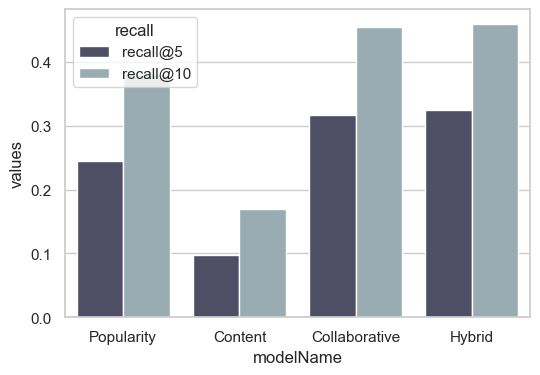

In [107]:
dfm = metrics.melt('modelName', var_name='recall', value_name='values')

sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.barplot(dfm, x="modelName", y="values", hue='recall', palette='bone')

Estas métricas proporcionan una comparación del rendimiento de los diferentes modelos de recomendación en cuanto a su capacidad para sugerir elementos relevantes para los usuarios en las posiciones principales de las recomendaciones. El modelo de popularidad tiene un recall@5 de aproximadamente 0.245 y un recall@10 de alrededor de 0.381. Esto indica que alrededor del 24.5% de los elementos relevantes fueron recomendados en los primeros 5 elementos, y aproximadamente el 38.1% en los primeros 10 elementos de la lista de recomendaciones.

Para el modelo basado en contenido, los valores de recall son más bajos, con un recall@5 de aproximadamente 0.097 y un recall@10 de alrededor de 0.170. Esto sugiere que este modelo recomendó menos elementos relevantes en las primeras posiciones de la lista de recomendaciones. Por otro lado, el modelo colaborativo muestra un recall@5 de alrededor de 0.317 y un recall@10 de aproximadamente 0.455, lo que indica que recomendó un mayor número de elementos relevantes en comparación con el modelo basado en contenido. Finalmente, el modelo híbrido tiene un recall@5 de aproximadamente 0.325 y un recall@10 de alrededor de 0.460, mostrando un desempeño ligeramente mejor que el modelo colaborativo en términos de recomendaciones relevantes en las primeras posiciones.

<h2>Pruebas</h2>

Realizamos pruebas del sistema de recomendación simulando ser un usuario específico. En este caso, seleccionamos al usuario con el identificador -1479311724257856983 para evaluar las recomendaciones de cada modelo. Esto nos permite obtener una perspectiva práctica de cómo cada modelo se desempeña al recomendar elementos para un usuario en particular, lo que nos ayuda a comprender mejor sus fortalezas y debilidades en un escenario de uso real.

In [108]:
def inspect_interactions(person_id, test_set=True):
    if test_set:
        interactions_df = val_df
    else:
        interactions_df = train_df
    
    return interactions_df.loc[person_id].merge(adf, how = 'left', on = 'contentId') .sort_values('eventStrength', ascending = False)[['eventStrength', 'contentId','title', 'url', 'lang']]

In [109]:
inspect_interactions(-1479311724257856983, test_set=False).head()

,eventStrength,contentId,title,url,lang
8,4.459432,7342707578347442862,"At eBay, Machine Learning is Driving Innovativ...",https://www.ebayinc.com/stories/news/at-ebay-m...,en
86,4.169925,2589533162305407436,6 reasons why I like KeystoneML,http://radar.oreilly.com/2015/07/6-reasons-why...,en
65,4.169925,621816023396605502,AI Is Here to Help You Write Emails People Wil...,http://www.wired.com/2016/08/boomerang-using-a...,en
114,4.087463,-4460374799273064357,"Deep Learning for Chatbots, Part 1 - Introduction",http://www.wildml.com/2016/04/deep-learning-fo...,en
84,4.000000,-7959318068735027467,Auto-scaling scikit-learn with Spark,https://databricks.com/blog/2016/02/08/auto-sc...,en


In [110]:
recommend_items(-1479311724257856983, verbose=True).head()

,eventStrength,contentId,title,url,lang
0,310.791362,-4029704725707465084,Former Google career coach shares a visual tri...,http://www.cnbc.com/2016/12/21/former-google-c...,en
1,237.145410,-6783772548752091658,Livro: Retrospectivas Divertidas,http://www.caroli.org/livro-retrospectivas-div...,pt
2,229.089057,-133139342397538859,"Novo workaholic trabalha, pratica esportes e t...",http://gq.globo.com/Prazeres/Poder/Carreira/no...,pt
3,199.660338,-8208801367848627943,Ray Kurzweil: The world isn't getting worse - ...,http://www.geekwire.com/2016/ray-kurzweil-worl...,en
4,196.174998,-6843047699859121724,"Ganhe 6 meses de acesso ao Pluralsight, maior ...",https://medium.com/@jeffersoncn/ganhe-6-meses-...,pt


In [111]:
recommend_cont_items(-1479311724257856983, verbose=True).head()

,recStrength,contentId,title,url,lang
0,0.639575,5250363310227021277,"How Google is Remaking Itself as a ""Machine Le...",https://backchannel.com/how-google-is-remaking...,en
1,0.637343,-7126520323752764957,"How Google is Remaking Itself as a ""Machine Le...",https://backchannel.com/how-google-is-remaking...,en
2,0.596787,638282658987724754,Machine Learning for Designers,https://www.oreilly.com/learning/machine-learn...,en
3,0.548772,-229081393244987789,Building AI Is Hard-So Facebook Is Building AI...,http://www.wired.com/2016/05/facebook-trying-c...,en
4,0.540678,-4571929941432664145,Machine Learning as a Service: How Data Scienc...,http://www.huffingtonpost.com/laura-dambrosio/...,en


In [112]:
recommend_collab_items(-1479311724257856983, verbose=True).head()

,recStrength,contentId,title,url,lang
0,0.264316,-8085935119790093311,Graph Capabilities with the Elastic Stack,https://www.elastic.co/webinars/sneak-peek-of-...,en
1,0.253769,-7986975759046428357,It's The Future,https://circleci.com/blog/its-the-future/,en
2,0.250950,-1901742495252324928,Designing smart notifications,https://medium.com/@intercom/designing-smart-n...,en
3,0.248407,-4228415104574264137,Up your app's sharing game with DirectShare - ...,https://medium.com/google-developers/up-your-a...,en
4,0.247311,7395435905985567130,The AI business landscape,https://www.oreilly.com/ideas/the-ai-business-...,en


In [113]:
recommend_hybrid_items(-1479311724257856983, verbose=True).head()

,recStrengthHybrid,contentId,title,url,lang
0,26.431612,-8085935119790093311,Graph Capabilities with the Elastic Stack,https://www.elastic.co/webinars/sneak-peek-of-...,en
1,25.387432,-1901742495252324928,Designing smart notifications,https://medium.com/@intercom/designing-smart-n...,en
2,25.376931,-7986975759046428357,It's The Future,https://circleci.com/blog/its-the-future/,en
3,25.071517,7395435905985567130,The AI business landscape,https://www.oreilly.com/ideas/the-ai-business-...,en
4,24.960855,2589533162305407436,6 reasons why I like KeystoneML,http://radar.oreilly.com/2015/07/6-reasons-why...,en


Al realizar la evaluación de los modelos, observamos los títulos recomendados por cada uno y notamos que algunos de ellos se repiten entre los diferentes modelos. Esta observación nos brinda una visión más detallada de cómo cada modelo selecciona y prioriza los elementos para recomendar. Para evaluar la efectividad de estas recomendaciones, comparamos los títulos sugeridos con los datos de prueba de interacciones del usuario seleccionado. Utilizamos esta comparación para calcular el recall, una métrica que nos indica qué tan bien cada modelo logra recomendar los artículos con los que el usuario ha interactuado previamente. De esta manera, podemos medir y comparar la capacidad de cada modelo para sugerir elementos relevantes para el usuario en cuestión.

<h1>Discusión</h1>

La comparación de las métricas de recall para los diferentes modelos de recomendación proporciona una visión completa de su desempeño en la generación de recomendaciones relevantes. Los resultados muestran que el modelo de popularidad obtiene un recall relativamente alto tanto para las mejores 5 como para las mejores 10 recomendaciones, lo que indica que es capaz de sugerir una cantidad significativa de elementos relevantes para los usuarios. Por otro lado, el modelo basado en contenido muestra un rendimiento inferior en términos de recall, lo que sugiere que sus recomendaciones pueden no ser tan relevantes para los usuarios en comparación con los otros modelos.

El modelo colaborativo supera al modelo basado en contenido en términos de recall, lo que indica que es más efectivo para recomendar elementos relevantes para los usuarios. Sin embargo, el modelo híbrido muestra un rendimiento ligeramente mejor que el modelo colaborativo, lo que sugiere que la combinación de diferentes enfoques de recomendación puede ser más efectiva para proporcionar recomendaciones personalizadas y relevantes.

Estos resultados tienen importantes implicaciones para los sistemas de recomendación. Por ejemplo, sugieren que la popularidad puede ser un indicador útil para generar recomendaciones iniciales, pero que modelos más avanzados, como los basados en contenido y colaborativos, pueden mejorar significativamente la calidad de las recomendaciones al tener en cuenta información más detallada sobre los usuarios y los elementos. Además, el modelo híbrido demuestra que la combinación de diferentes enfoques puede conducir a un rendimiento aún mejor, lo que destaca la importancia de la diversidad en la selección de modelos de recomendación.

Además de evaluar los modelos de recomendación, es crucial abordar el desafío del "cold start", que dificulta proporcionar recomendaciones precisas para usuarios nuevos o con poca actividad. Para abordar este problema, se pueden implementar varias estrategias. En primer lugar, la recolección de información adicional durante el registro, como información demográfica o preferencias iniciales, puede ayudar a personalizar las recomendaciones desde el principio. Además, el uso de recomendaciones basadas en contenido, que se centran en características de los elementos en lugar del comportamiento del usuario, puede ser efectivo para usuarios nuevos. Los modelos híbridos que combinan múltiples enfoques de recomendación también pueden adaptarse al cold start, utilizando recomendaciones basadas en popularidad para usuarios nuevos y cambiando a enfoques más personalizados a medida que se recopila más información sobre el usuario. Asimismo, aumentar la diversidad de contenido inicial y ofrecer incentivos para la interacción temprana pueden fomentar la participación de los usuarios y proporcionar datos útiles para mejorar las recomendaciones. Estas estrategias pueden ayudar a mejorar la experiencia de los usuarios nuevos y abordar el desafío del cold start en los sistemas de recomendación.

<h1>Conclusión</h1>

En este estudio, hemos diseñado, implementado y evaluado varios modelos de sistemas de recomendación para la plataforma Deskdrop, una herramienta clave en el intercambio de información dentro de las organizaciones. Nuestro objetivo era mejorar la experiencia del usuario y la utilidad de Deskdrop mediante la generación de recomendaciones personalizadas y relevantes para cada empleado.

Hemos explorado diferentes enfoques de recomendación, incluyendo modelos de popularidad, basados en contenido, colaborativos y híbridos. Nuestra evaluación se centró en métricas de recall para las mejores 5 y 10 recomendaciones, que proporcionan una medida de la capacidad de los modelos para sugerir elementos relevantes para los usuarios.

Los resultados muestran que, si bien el modelo de popularidad puede ser útil para generar recomendaciones iniciales, los modelos más avanzados, como los basados en contenido, colaborativos y híbridos, pueden mejorar significativamente la calidad de las recomendaciones al tener en cuenta información más detallada sobre los usuarios y los elementos. Específicamente, observamos que el modelo híbrido, que combina diferentes enfoques de recomendación, mostró un rendimiento ligeramente mejor en términos de recall para las mejores 5 y 10 recomendaciones.

Estos hallazgos destacan la importancia de la diversidad en la selección de modelos de recomendación y la necesidad de adaptarse al contexto específico de la plataforma y los usuarios. Además, identificamos el desafío del "cold start" como un aspecto crucial a abordar, ya que dificulta proporcionar recomendaciones precisas para usuarios nuevos o con poca actividad. Para mitigar este desafío, sugerimos estrategias como la recolección de información adicional durante el registro, el uso de recomendaciones basadas en contenido y la implementación de modelos híbridos que puedan adaptarse a diferentes escenarios.